**Author:Sejal Tawade**

**The Sparks Foundation - Data Science and Business Analytics**

**Task 8:Timeline Analysis Covid-19**

*Create a storyboard showing spread of Covid 19 cases in your country or 
any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

*Use animation, timeline and annotations to create attractive and interactive dashboards and story

*Identify interesting patterns and possible reasons helping Covid 19 spread with basic as well as advanced charts


In [ ]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
sns.set()

In [ ]:
#read Data
covid_data=pd.read_csv("/content/owid-covid-data.csv")

Understanding and analyzing the Data to understand the Data

In [ ]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60701 entries, 0 to 60700
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60355 non-null  object 
 1   continent                              59993 non-null  object 
 2   location                               60701 non-null  object 
 3   date                                   60701 non-null  object 
 4   total_cases                            60109 non-null  float64
 5   new_cases                              60102 non-null  float64
 6   new_cases_smoothed                     59147 non-null  float64
 7   total_deaths                           51646 non-null  float64
 8   new_deaths                             51645 non-null  float64
 9   new_deaths_smoothed                    59147 non-null  float64
 10  total_cases_per_million                59763 non-null  float64
 11  ne

In [ ]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [ ]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.010900e+04,60102.000000,59147.000000,5.164600e+04,51645.000000,59147.000000,59763.000000,59756.000000,58806.000000,51313.000000,51312.000000,58806.000000,48756.000000,6540.000000,6540.000000,7591.000000,7591.000000,575.000000,575.000000,951.000000,951.000000,2.806700e+04,2.824700e+04,28067.000000,28247.000000,3.176500e+04,31765.000000,30004.000000,29526.000000,6.110000e+02,4.420000e+02,822.000000,611.000000,822.000000,53924.000000,6.035500e+04,59079.000000,57752.000000,57082.000000,57425.000000,57781.000000,39548.000000,58375.000000,59057.000000,46085.000000,45454.000000,29221.000000,53631.000000,60045.000000,58039.000000
mean,3.046949e+05,3135.398223,3118.695322,9.915895e+03,78.645135,67.347718,5256.650313,58.404583,58.081400,132.149067,1.223742,1.046147,1.034323,939.605657,19.318656,4811.090238,130.549522,397.319798,24.407414,2727.040168,93.572771,3.549106e+06,3.463400e+04,121.551225,1.179959,3.343668e+04,1.140370,0.083581,164.719847,1.192870e+06,3.894021e+04,38812.167883,1.644173,973.611922,59.219389,9.073152e+07,324.261682,30.626243,8.841277,5.605593,19191.164553,13.163525,256.194688,7.767232,10.578173,32.637189,51.133277,3.042238,73.143126,0.715803
std,2.993673e+06,27949.916557,27487.805251,7.910267e+04,581.622548,521.629668,10687.412561,164.018688,135.533505,245.370861,3.859944,2.676596,0.367551,2657.528421,23.859858,13292.282659,181.426999,1047.228401,83.965395,6178.771986,234.234478,1.635924e+07,1.402656e+05,248.559343,2.924302,1.293156e+05,2.099892,0.099750,833.032720,4.501993e+06,1.065868e+05,94178.715598,4.063520,1984.647472,22.388962,6.187942e+08,1577.913252,9.119478,6.255421,4.272740,19668.645139,19.877800,118.062425,3.888514,10.414834,13.451533,31.774439,2.471797,7.548949,0.153767
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-4.751000e+04,0.000000,-0.786000,0.000000e+00,0.000000,0.000000,1.600000,0.000000e+00,3.000000e+00,51.000000,0.000000,1.000000,0.000000,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.050000e+02,1.000000,4.286000,2.700000e+01,0.000000,0.000000,101.804000,0.066000,0.794000,4.615000,0.000000,0.000000,0.880000,15.000000,2.523750,61.000000,13.261500,5.631000,1.301000,24.097500,5.856000,8.622450e+04,1.216000e+03,6.323000,0.090000,1.279000e+03,0.090000,0.013000,8.400000,1.251800e+04,1.654500e+03,1291.750000,0.125000,191.250000,44.440000,2.722291e+06,36.253000,22.200000,3.466000,2.043000,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,5.121000e+03,42.000000,51.286000,1.580000e+02,1.000000,0.714000,788.142000,4.743000,6.407000,24.295000,0.076000,0.080000,1.050000,80.000000,8.292000,333.000000,50.150000,38.875000,3.566000,209.423000,23.079000,4.017380e+05,4

In [ ]:
#checking for dublicates and removing them
covid_data.duplicated().sum()

0

In [ ]:
covid_data.isna().mean()*100

iso_code                                  0.570007
continent                                 1.166373
location                                  0.000000
date                                      0.000000
total_cases                               0.975272
new_cases                                 0.986804
new_cases_smoothed                        2.560090
total_deaths                             14.917382
new_deaths                               14.919029
new_deaths_smoothed                       2.560090
total_cases_per_million                   1.545279
new_cases_per_million                     1.556811
new_cases_smoothed_per_million            3.121860
total_deaths_per_million                 15.465973
new_deaths_per_million                   15.467620
new_deaths_smoothed_per_million           3.121860
reproduction_rate                        19.678424
icu_patients                             89.225878
icu_patients_per_million                 89.225878
hosp_patients                  

In [ ]:
covid_data.shape

(60701, 55)

In [ ]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


**Create a new Dataset by copying the original**

In [ ]:
covid_data1=covid_data[['date','total_cases','new_cases','total_deaths','new_deaths','total_tests','new_tests']]

In [ ]:
covid_data1.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN


Change the format of date to the format used

In [ ]:
covid_data1['date']=pd.to_datetime(covid_data1['date'],infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
covid_data1.set_index('date',inplace=True)

Text(0.5, 0, 'month')

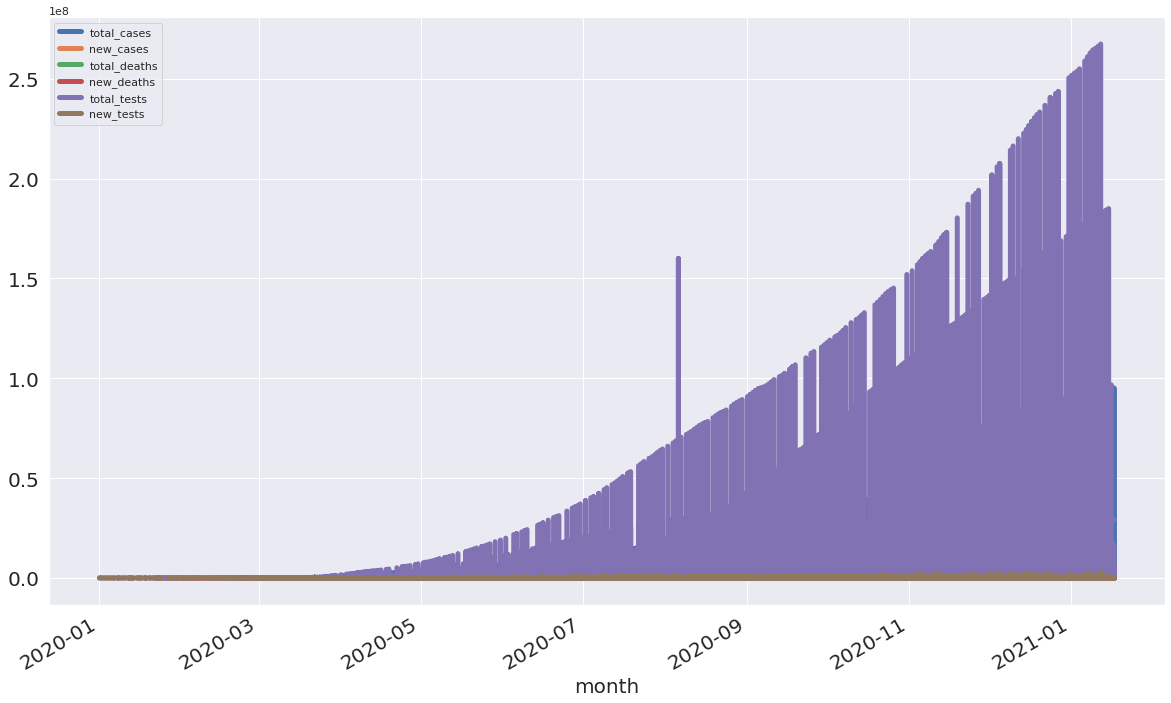

In [ ]:
#plotting the Data we created
covid_data1.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('month',fontsize=20)

**We can see there is tremendous increase in the trends for all cases(test or tests)**

Text(0.5, 0, 'month')

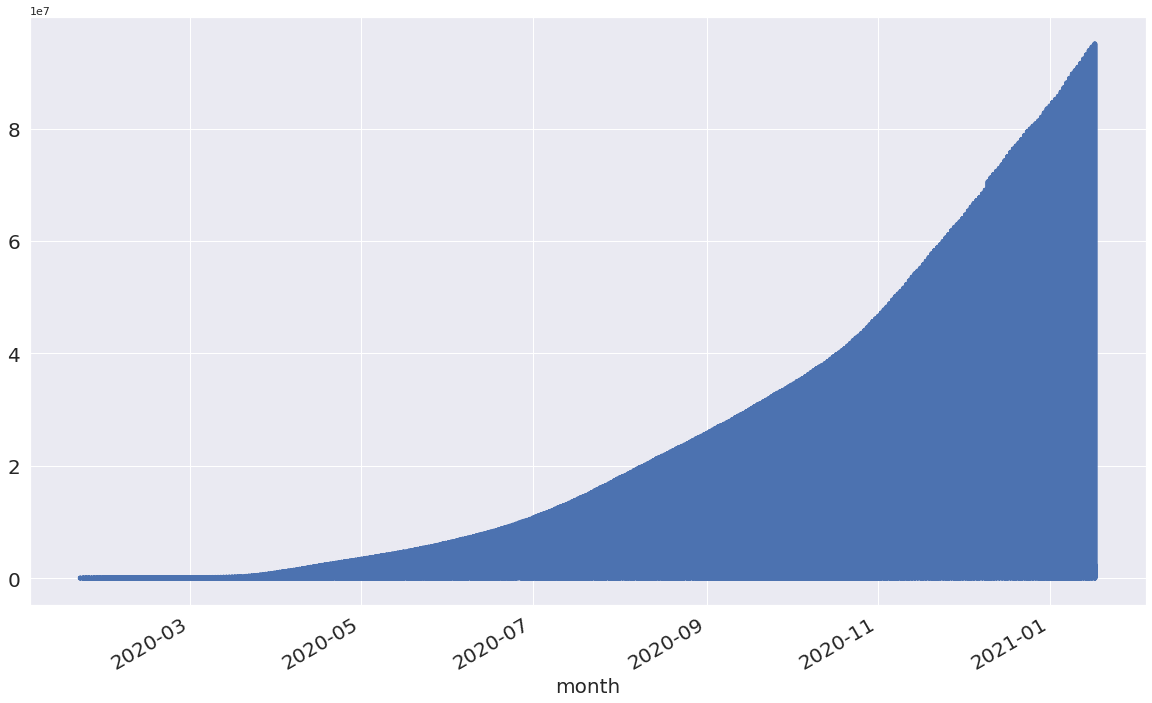

In [ ]:
#plotting data of total cases
covid_data1.total_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('month',fontsize=20)


**cases have increase expotentilly**

Text(0.5, 0, 'month')

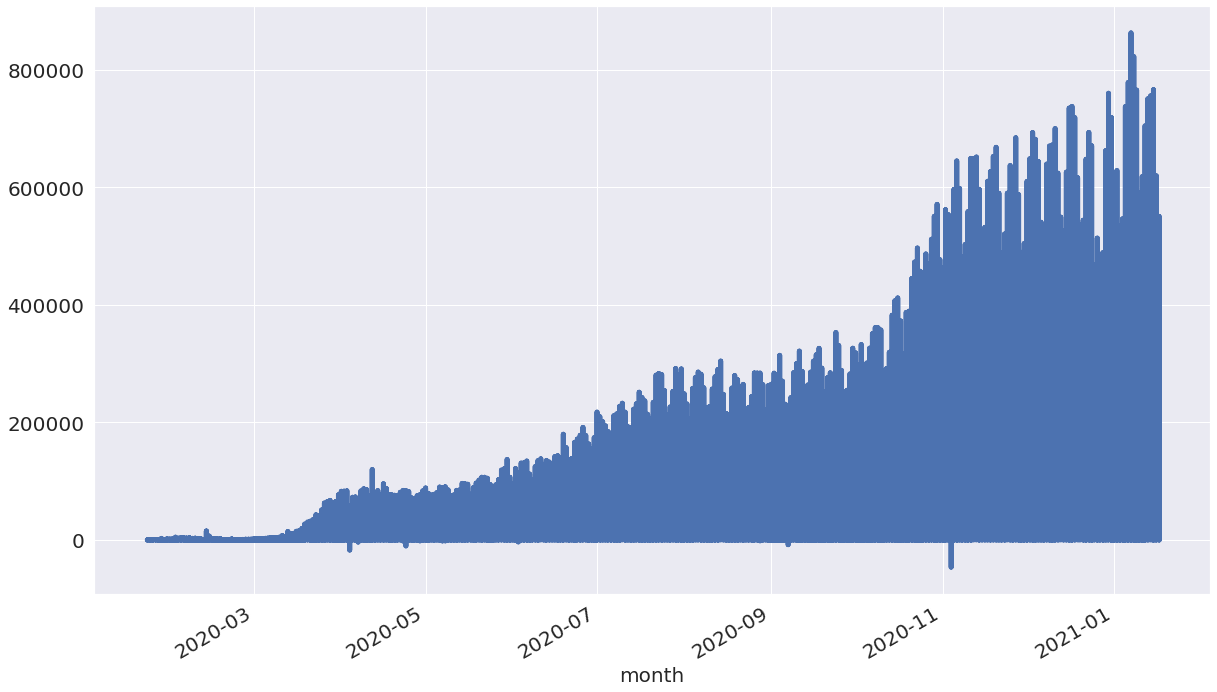

In [ ]:
#plotting Data of new cases
covid_data1.new_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('month',fontsize=20)


**There was a steep increase in cases towards the end of 2020**

Text(0.5, 0, 'month')

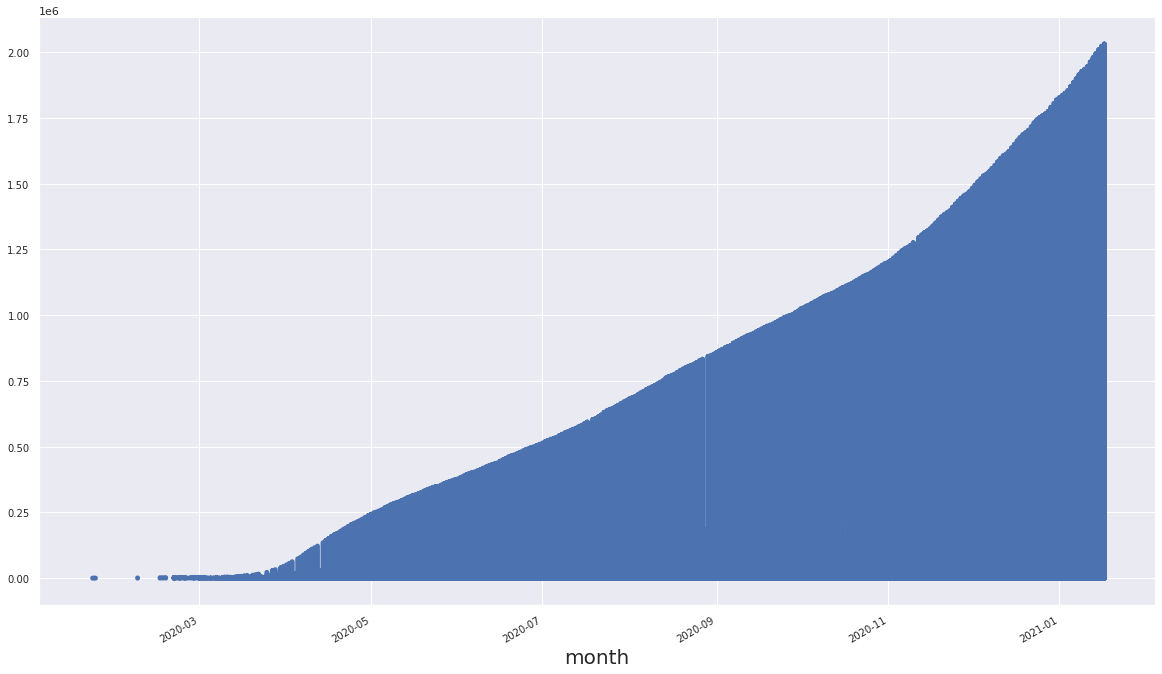

In [ ]:
#plotting Data of total deaths
covid_data1.total_deaths.plot(figsize=(20,12),linewidth=5,fontsize=10)
plt.xlabel('month',fontsize=20)

**Deaths are incresing with increase in cases**

plotting Data of new tests

Text(0.5, 0, 'month')

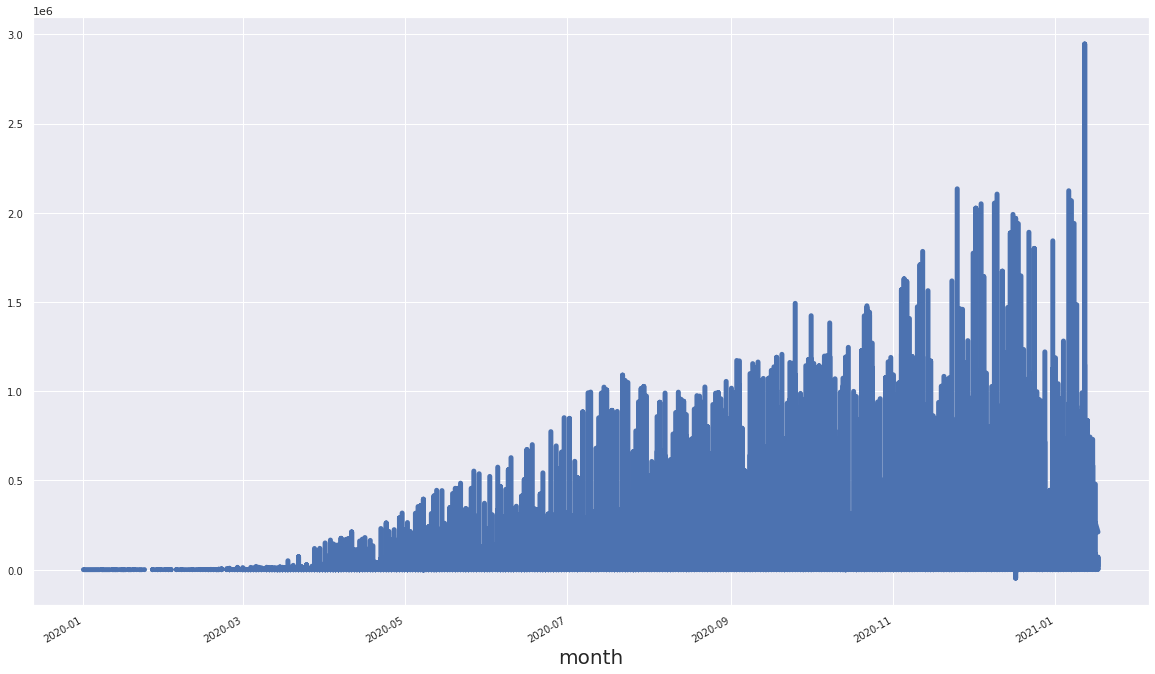

In [ ]:
covid_data1.new_tests.plot(figsize=(20,12),linewidth=5,fontsize=10)
plt.xlabel('month',fontsize=20)

**Testing have trends depending of number of new cases and with increase of cases testing also increased**

plotting Data of Total tests done

Text(0.5, 0, 'month')

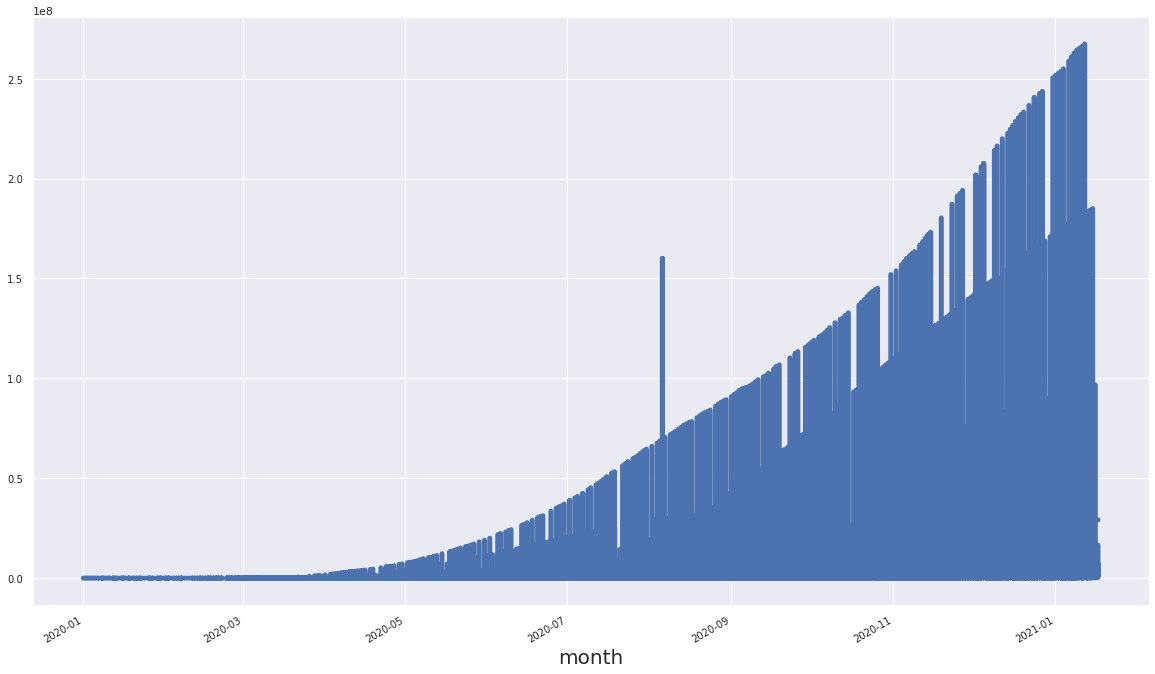

In [ ]:
covid_data1.total_tests.plot(figsize=(20,12),linewidth=5,fontsize=10)
plt.xlabel('month',fontsize=20)

**Total number of maximum tests being done in october-November months and month of august**

Trends in Time Series Data

Text(0.5, 0, 'Months')

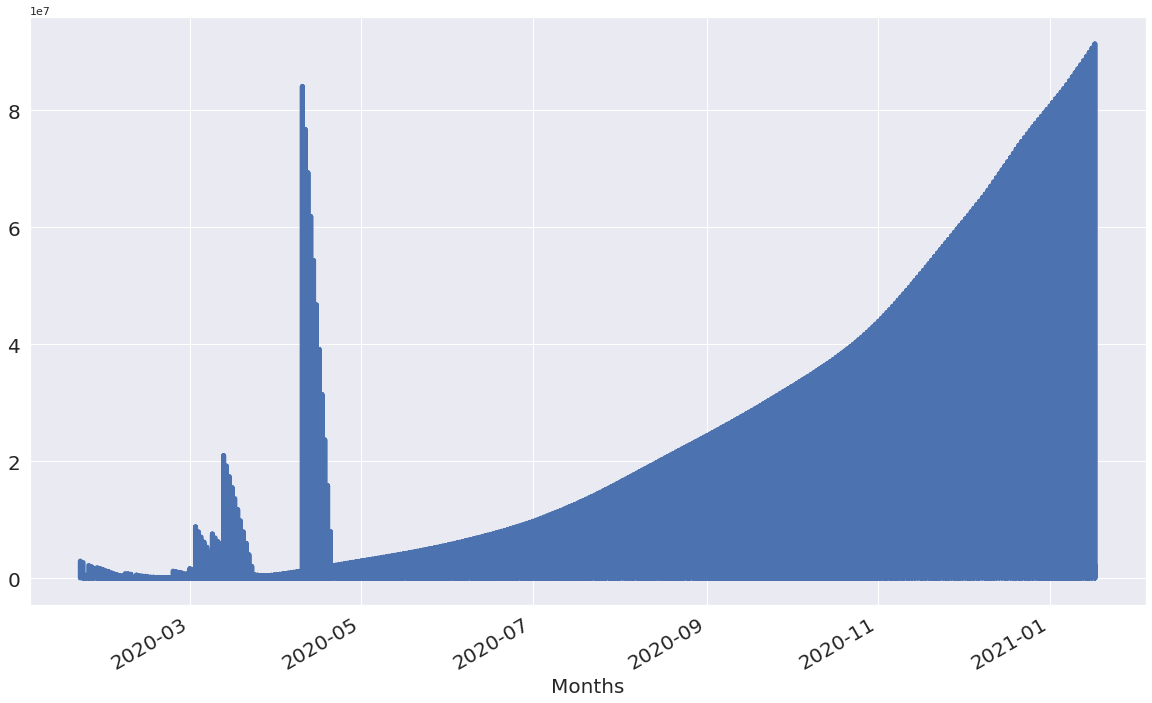

In [ ]:
total_cases= covid_data1.total_cases
total_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

**The case were at peak in march,june and have increased more in october and november**

Text(0.5, 0, 'Months')

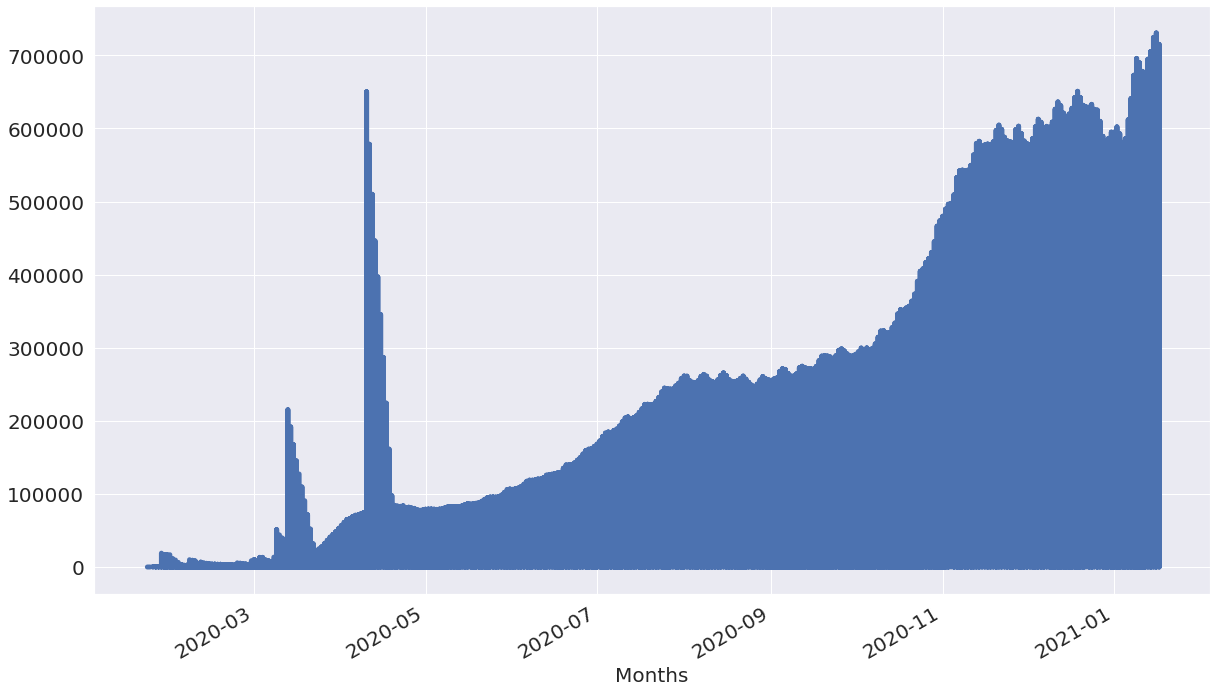

In [ ]:
new_cases= covid_data1.new_cases
new_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

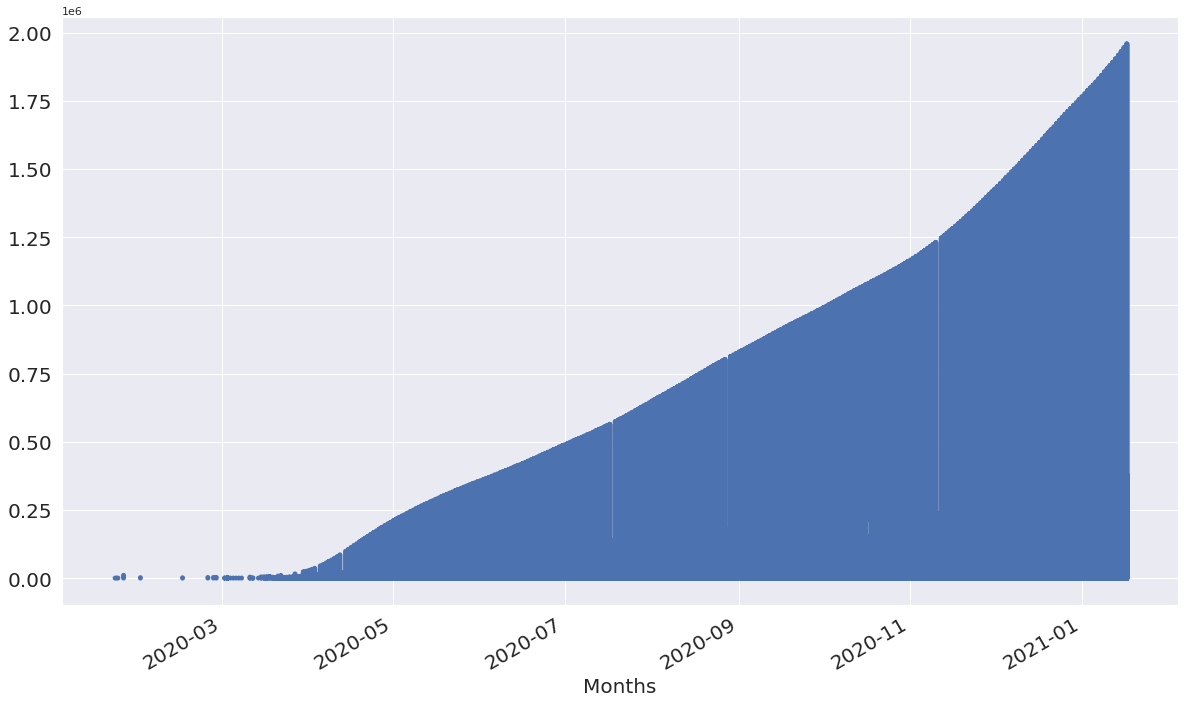

In [ ]:
total_deaths= covid_data1.total_deaths
total_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

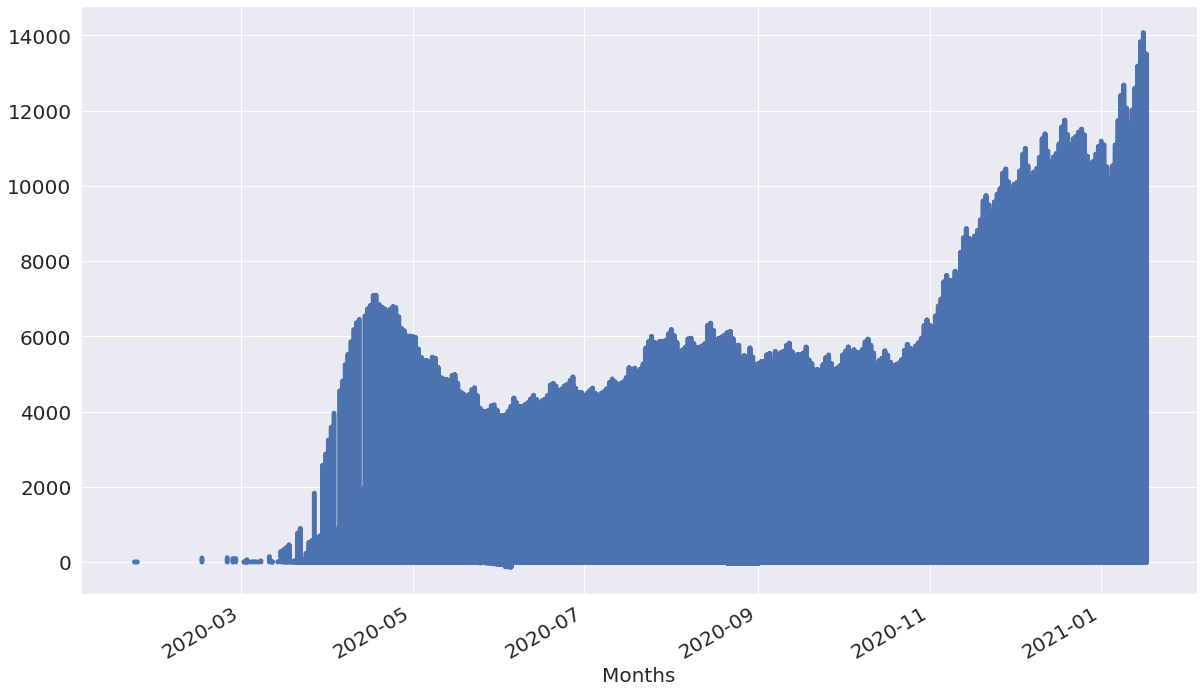

In [ ]:
new_deaths= covid_data1.new_deaths
new_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

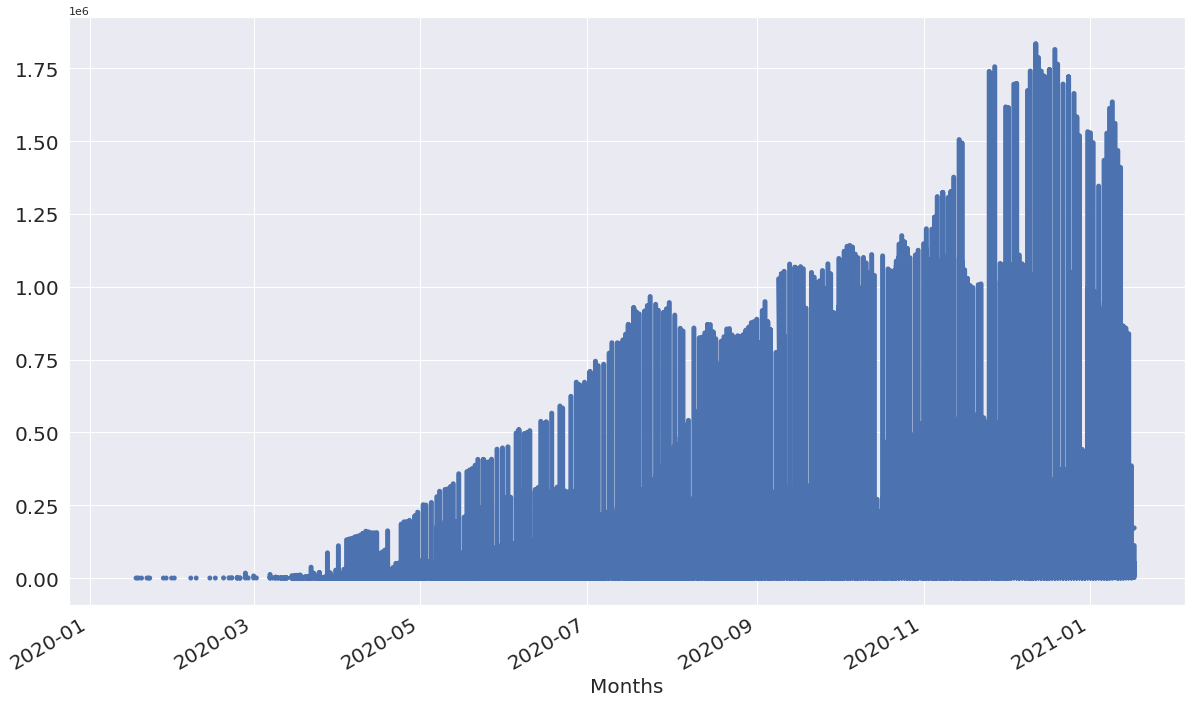

In [ ]:
new_tests= covid_data1.new_tests
new_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

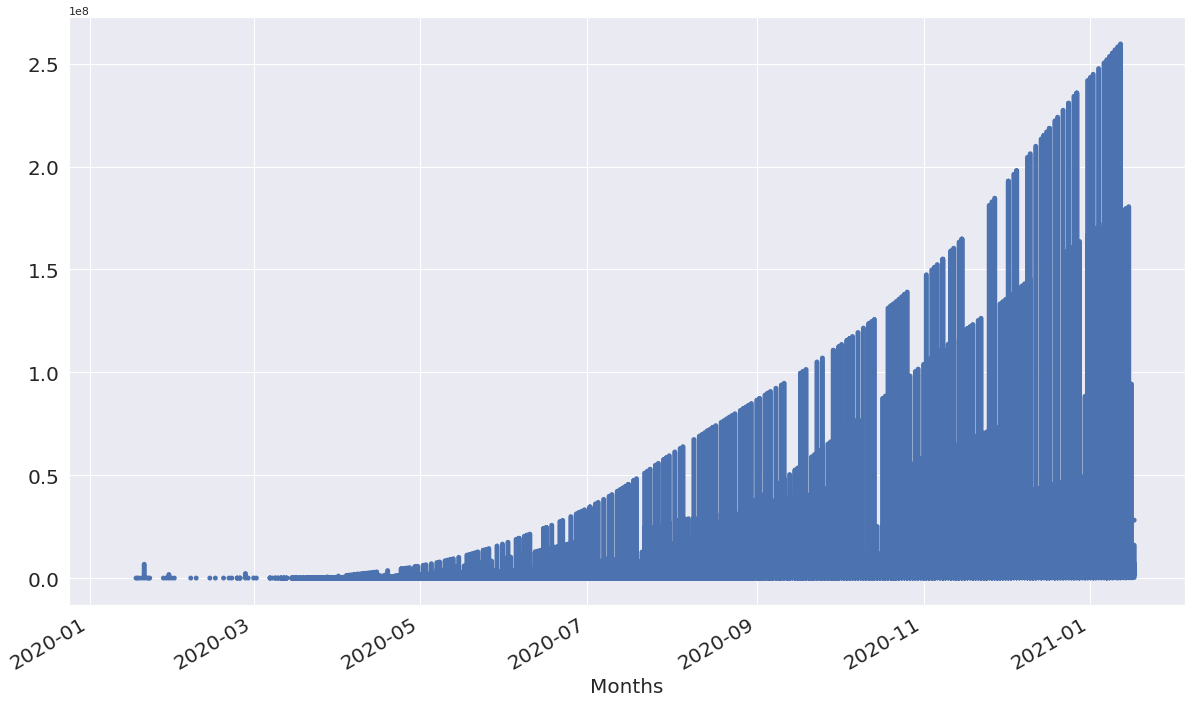

In [ ]:
total_tests= covid_data1.total_tests
total_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

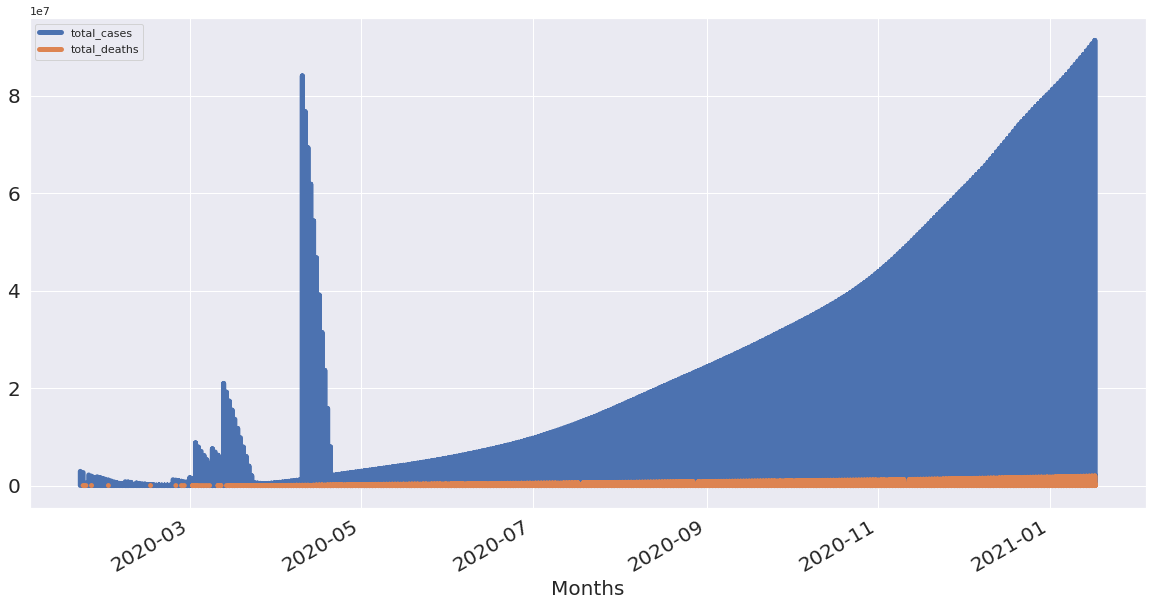

In [ ]:
df_rm=pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()],axis=1)
df_rm.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Months' , fontsize = 20)

The number of deaths is relatively very very low as compared to number of cases showing good degree of recovery

**Seasonality in TimeSeries DataSet**

Text(0.5, 0, 'Months')

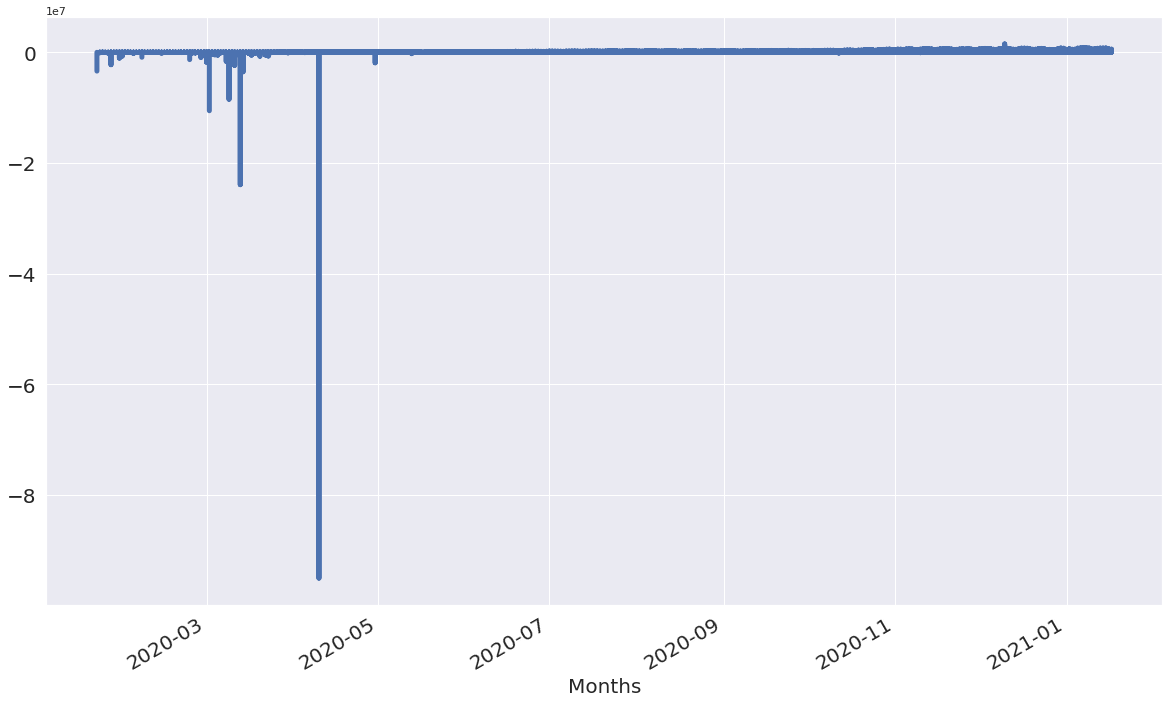

In [ ]:

total_cases.diff().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Months', fontsize = 20)